# Project 1 - Linear models and regularization

For general information about the practicals please refer to the [course main page](https://github.com/Computational-Biology-TUe/8BB020_Intro-machine-learning). Before starting this project make sure that you have correctly setup your environment as described in [the first practical](https://github.com/Computational-Biology-TUe/8BB020_Intro-machine-learning/blob/main/practicals/part0_intro.ipynb).

This practical will run over three weeks and is divided in three sections:

Project 1.1: Linear and logistic regression (week 2)

Project 1.2: Regularization for linear models (week 3)

Project 1.3: Application of linear models to a case study (week 4)

Only for Project 1.3 there are deliverables that will be graded. However, Project 1.3 build upon Project 1.1 and Project 1.2. You can already start working on Project 1.3 during week 2 and week 3 but only after you have completed all the exercises of the corresponding week.

### Learning outcomes
After finishing project 1.1 - 1.3, the student can:
* Define key terminology related to linear models
* Explain the difference between linear and logistic regression, both theory and application
* Implement and train linear models using Python
* Understand and apply regularization to improve model performance 

### Contents
* [Project 1.1: Linear regression (week 2)](#project11_lin)
  * [Exercise 1](#exercise1)
* [Project 1.1: Logistic regression (week 2)](#project11_log)
  * [Exercise 2](#exercise2)
* [Project 1.2 Ridge linear regression (week 3)](#project12_lin)
  * [Exercise 3](#exercise3)
* [Project 1.2 Ridge logistic regression (week 3)](#project12_log)
  * [Exercise 4](#exercise4)
* [Project 1.2 Influence of regularization parameter (week 3)](#project12_reg)
* [Project 1.2 Comparison ridge and lasso regularization (week 3)](#project12_comp)
* [Project 1.3 Application of linear models to a case study (week 4)](#project13)

NB: If you want to work on this notebook with your group simultaneously, i.e. more people working from different laptops on the same jupyter notebook, you can try out Google Colab by clicking this button:

<a target="_blank" href="https://colab.research.google.com/github/Computational-Biology-TUe/8BB020_Intro-machine-learning/blob/main/practicals/part_1_linear_models.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<div class="alert alert-block alert-warning">
<b>Important:</b> In the sections below we will use the Python libraries scikit-learn and pandas. This is not intended to be a complete tutoral of these libraries as the scope of the examples and exercises is to introduce you to linear regression models. Many tutorials exist on the internet and we recommend <a href="https://scikit-learn.org/stable/getting_started.html">this one</a> for scikit-learn and <a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/">this one</a> for pandas, which covers the basics of the libraries. It is highly recommended to go over them before proceeding. 
</div>

# Project 1.1: Linear regression (week 2) <a class="anchor" id="project11_lin"></a>
## Linear regression theory in a nutshell

### Linear regression model
A short recap of the linear model formulation:

$ y =\hat y +\epsilon $; 

$\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_m x_m$;  

* $x_i,...,x_m$: inputs (can represent e.g. age)
* $y$: output or actual value (can represent e.g. systolic blood pressure)
* $\hat y$: predicted output by the model 
* $\theta_i, ..., \theta_m$: model coefficients, variables or parameters (also indicated as $\beta_i$), these are the values we adjust during model training
* $\epsilon$: error, or difference between actual value and model prediction (also indicated as $e_i$)
* $m$: number of inputs and model coefficients 

### Matrix formulation
As we want to implement the model in Python, we'll use the matrix formulation. The linear model is as follows using a matrix formulation with $n$ observations (number of samples in data set), each with $m$ variables:  

$
\begin{align}
\mathbf{Y} = \mathbf{X} \boldsymbol{\theta}
\end{align}
$  

$
\begin{align}
\mathbf{Y} =
\begin{bmatrix}y_{1} \\ y_{2} \\ \ldots \\ y_{n}  \end{bmatrix}
,
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1m} \\
1 & x_{21} & x_{22} & \ldots & x_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{nm}
\end{bmatrix}
,
\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_m \end{bmatrix}
\end{align}
$


### Linear regression using least squares
The difference between the actual data points ($y$) and the value predicted by the model ($\hat y$) is used to define a *loss function* for every data point. The model's *cost function* $J(\theta)$ is then defined based on the loss per observation. Initially, the cost function is just the sum of the loss function values for all data points. In a later stage, we will see that we can tweak the model's cost function, and thereby the model's behaviour, by adding extra parameters to this sum. In any event, the aim is to find an optimal set of parameters $\mathbf{\theta}$ that minimizes these differences, i.e. the cost function. 

Least squares is a widespread method used to define a loss function for an observation. We can use the following steps to derive the analytical solution to the least squares approach:

#### Step 1 : Defining loss function 
The loss function is defined as the square of the difference between the observed and model value: $y_i - \hat{y}_i$. We define the *residual sum of squares (RSS)* as the sum of these squares for every observation $i$, with $i=1, \dots, n$, and use this sum as our cost function:  

$
\begin{align}
J(\boldsymbol{\theta}) = RSS(\boldsymbol{\theta} ) = \sum_{i=1}^{n} {\epsilon_i^2} = \sum_{i=1}^{n} {(y_i-\hat{y}_i)^2} = \sum_{i=1}^{n}{(y_i-(\theta_0 + \sum_{j=1}^{m}{x_{ij} \theta_{ij}}))^2}
\end{align}
$  

or in matrix notation, using the definitions above:  

$J(\boldsymbol{\theta})  = (\mathbf{y-X\theta})^T(\mathbf{y-X\theta})$    

#### Step 2 : Calculate gradient of loss function 
The optimal solution is the one where $J(\boldsymbol{\theta})$ is minimal. We can determine the analytical solution to this minima by calculating the *gradient*. First, differentiate $J(\boldsymbol{\theta})$ with respect to $\mathbf{\theta}$:  

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})  = -2\mathbf{X}^T (\mathbf{y}-\mathbf{X}\mathbf{\theta})
\end{align}
$ 

Or, when using the same notation as in the lecture notes:

$
\begin{align}
\frac{\partial RSS}{\partial \beta_{1}} = -2 \sum_{i=1}^n (y_{i}-(\beta_{0}+\beta_{1}x_{i}))x_{i}
\end{align}
$ 

#### Step 3 : Set gradient to 0 to find minima 
Next, we can find the optimal solution when this loss function is minimal, i.e. when the gradient is zero: $-2\mathbf{X}^T (\mathbf{y}-\mathbf{X}\mathbf{\theta})=0$. We can rewrite this to </font> derive an expression for $\mathbf{\theta}$:  

$
\mathbf{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X^T}\mathbf{y}
$ , provided $(\mathbf{X^T}\mathbf{X})^{-1}$ is non-singular.

This is actually the product of a matrix and a vector:

$
\begin{align}
\boldsymbol{\theta} = (\underbrace{\mathbf{X}^\top \mathbf{X}}_{\mathbf{A}})^{-1} \underbrace{\mathbf{X}^\top \mathbf{y}}_{\text{b}}
\end{align}
$

***Hint***: this is one of the equations that you need to implement in the Exercise 1: Implementation of linear regression model</font>

### Linear regression using gradient descent
If an analytical solution such as the one above is not feasible, e.g. because $(\mathbf{X^T}\mathbf{X})^{-1}$ is (near-)singular, we can use an iterative approach. We start off with a solution ${\boldsymbol{\theta}}$ and calculate the associated cost function value. We then change the current solution ${\boldsymbol{\theta}}$ in such a way that the cost function value reduces. We do this by changing ${\boldsymbol{\theta}}$ by moving in a direction where the gradient is less than its current value (is descending), as depicted in the figure below:  

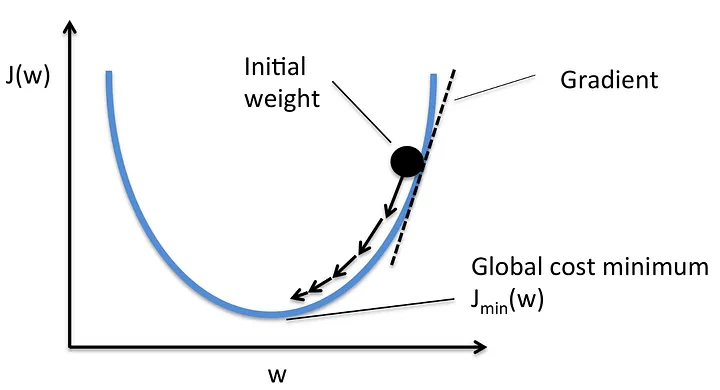!

We use a stopping criterium to stop iterating (e.g. stop when $\boldsymbol{\theta}$ no longer significantly changes, or after a certain nr of iterations) and use the resulting  ${\boldsymbol{\theta}}$ as the solution. (see for example https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82).  

As defined above for the analytical solution, the gradient can be rewritten as follows: 

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})  = -2\mathbf{X}^T (\mathbf{y}-\mathbf{X}\mathbf{\theta})
\end{align}
$ 

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) &= 2 (\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y}) \\
&= 2 \mathbf{X}^\top ( \mathbf{X} \boldsymbol{\theta} - \mathbf{y})
\end{align}
$

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = 2 \mathbf{X}^\top (\overbrace{ \underbrace{\mathbf{X} \boldsymbol{\theta}}_{\text{prediction}} - \mathbf{y} }^{\text{error}}) \\
\end{align}
$

We can use this gradient to improve on the intermediate solution $\boldsymbol{\theta}$, by going against the gradient towards the minimum. We can also represent this as taking steps with size $\eta$ towards the minimum. In our formulation, we therefore subtract a small value $\eta$ times the gradient to get a new solution that moves towards the minimum:

$
\begin{align}
\boldsymbol{\theta}^{(\text{new})} = \boldsymbol{\theta}^{(\text{current})} - \eta \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
\end{align}
$

$
\begin{align}
\boldsymbol{\theta}^{(\text{new})} = \boldsymbol{\theta}^{(\text{current})} \underbrace{-}_{\text{opposite direction as we want to find the minima}} \overbrace{\eta}^{\text{small step}} \underbrace{\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})}_{\text{direction of the gradient}}
\end{align}
$

***Hint***: this is one of the equations that you need to implement in the Exercise 1: Implementation of linear regression model</font>

## Linear regression playground <a name="linreg_2"></a>

### Linear regression with one variable
The playground below gives an idea of how parameters influence a basic simple linear regression model $\hat{y}_i = \theta_0+ \theta_1 x_i$ for 1 input $x_i$ and $n$ datapoints $(y_i, x_i), i \in [1,...,n]$. On the left you can compare data points and the regression model outputs. On the right, the loss function is visualized defined here as MSE, which is the average RSS across data points. You can adjust model parameters $\theta_0, \theta_1$ and see how these affect model outputs and model error. Different combinations of $\theta_0 , \theta_1$ can yield the same loss function value (ellipses). The optimal solution (1.00, 1.50) yields the lowest possible Mean Squared Error $\frac{1}{n}\sum (y_i-\hat{y_i})^2 =3.31$. Note: ```demos``` was written for this course so you can inspect the code to see what goes on behind the scenes. 

* <font color='#770a0a'>1. What would the graph (left figure) look like if the calculated MSE would be zero? 

* <font color='#770a0a'>2. Why is the red cross not on an ellipse? What do the ellipses represent?</font>* 

In [ ]:
import demos

linr1d = demos.LinearRegression1D()
linr1d.run()


interactive(children=(FloatSlider(value=1.0, description='$\\theta_0$ (bias):', max=10.0, min=-10.0), FloatSli…

### Linear regression with two variables
In the playground above, we only had one parameter ($\theta_1$). When adding a parameter $\theta_2$, you'll see in the playground below that the model outputs are located on a plane. Same as above, you can adjust model parameter values and see the effect on the model outputs for a model with two parameters: $\hat{y_i} = \theta_0 + \theta_1 x_{i1}+ \theta_2 x_{i2}, i \in [1,...,n]$. The MSE is also given in the legend, so you can inspect how this is affected as you change the values of the model parameters. 

In [5]:
import demos

linr2d = demos.LinearRegression2D()
linr2d.run()


interactive(children=(FloatSlider(value=1.0, description='$\\theta_0$ (bias):', max=10.0, min=-10.0), FloatSli…

## Exercise 1: Implementation of linear regression model <a class="anchor" id="exercise1"></a> 

The package ```tests``` that is used below was written for this course. Its method ```compare_linear_regression``` takes two classes that must have methods ```fit``` and ```predict```. One of these classes is your custom class MyLinearRegression, the other class is to be a class that implements a 'golden standard' model: in this case, we provide sklearn's ```LinearRegression```. The tester uses both classes to fit a random dataset and shows the results. You can read more about the ```LinearRegression``` class here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Like the majority of models in sklearn, ```LinearRegression``` has two standard methods: ```fit``` and ```predict```. Normally, you first instantiate a class, e.g. ```linreg_model = LinearRegression()```. Then you fit the model to the data, and lastly you use this fit to predict the outcome:  
```
linreg_model.fit(X,y) # calculates model parameters
y_predicted = linreg_model.predict(X) # uses model parameters to predict outcome for given X
```

When you check the code, you'll see ```compare_linear_regression``` will run 3 models: your standard linear regression model (```_solve_normal```), your gradient descent model ```_solve_gradient_descent``` and the reference model (sklearn's ```LinearRegression```). You can also see that ```compare_linear_regression``` expects ```fit()``` and ```predict()``` methods like in ```LinearRegression``` (which have already been added for you). The tester will show the data, fitted with the standard model as well as your models (which for now return small random parameters, resulting in semi-horizontal lines). It also shows the Mean Squared Error $\frac{1}{n}\sum (y_i-\hat{y_i})^2 $. 

*<font color='#770a0a'>1.The theory above mentioned using the RSS as a loss function. What is the effect of using the MSE instead? Could you name advantages?</font>*

*<font color='#770a0a'>2. What is the purpose of the method ```augment_matrix()```?</font>* 

*<font color='#770a0a'>3. What exactly is computed by ```predict```?</font>*

<font color='#770a0a'> 4. *```epochs``` is the number of iterations. ```learning_rate``` stands for a symbol used in the theory above- which one?* <font>

*<font color='#770a0a'>5. Alter the methods ```_solve_normal``` and ```_solve_gradient_descent``` in the code below to obtain the correct model parameters ```theta```. Add code between the comments ```#start exercise 1.x``` and ```#end exercise 1.x```. When done properly, your class should return the same results (same line with same MSE) as the LinearRegression class passed as the 'reference model', i.e. all model lines should overlap and return the same MSE. Note that ```_solve_normal``` refers to using the analytical solution (least squares) while ```_solve_gradient_descent``` is using the iterative gradient descent approach</font>* 

In [ ]:
import numpy as np

def augment_matrix(X):
    return np.c_[np.ones((X.shape[0], 1)), X] 

class MyLinearRegression:
    def __init__(self, solver='normal', epochs=1000, learning_rate=0.01):
        self.theta = None
        self.solver = solver
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y):
        if self.solver == 'normal':
            self.theta = self._solve_normal(X, y)
        elif self.solver == 'gd':
            self.theta = self._solve_gradient_descent(X, y, self.epochs, self.learning_rate)
        else:
            raise ValueError("Solver not recognized. Use 'normal' or 'gd'.")

    def _solve_normal(self, X, y):

        X_b = augment_matrix(X)        
        n_samples, n_features = X_b.shape
        
        # replace the code below (which returns random values for theta) with your solution to return the correct solution for theta
        # START EXERCISE 1.1 #      
        matrix_A = np.linalg.inv(np.matmul((np.transpose(X_b)),X_b))
        vector_B = np.matmul((np.transpose(X_b)),y)
        self.theta = np.matmul(matrix_A,vector_B)
        # self.theta = np.random.randn(n_features)
        # END EXERCISE 1.1 #
        
        return self.theta

    def _solve_gradient_descent(self, X, y, n_epochs, learning_rate):
        X_b = augment_matrix(X)        
        n_samples, n_features = X_b.shape
        
        # replace the code below (which returns random values for theta) with your solution to return the correct solution for theta
        # START EXERCISE 1.2 #
        theta_current = self.theta
        for i in range(n_epochs):
            prediction = np.matmul(X_b,theta_current)
            error = prediction - y
            j_nabla = (2*(np.transpose(X_b)))
        
        #self.theta = np.random.randn(n_features)
            
        # END EXERCISE 1.2 #
        
        return self.theta

    def predict(self, X):
        X_b = augment_matrix(X)
        return X_b.dot(self.theta)


1000


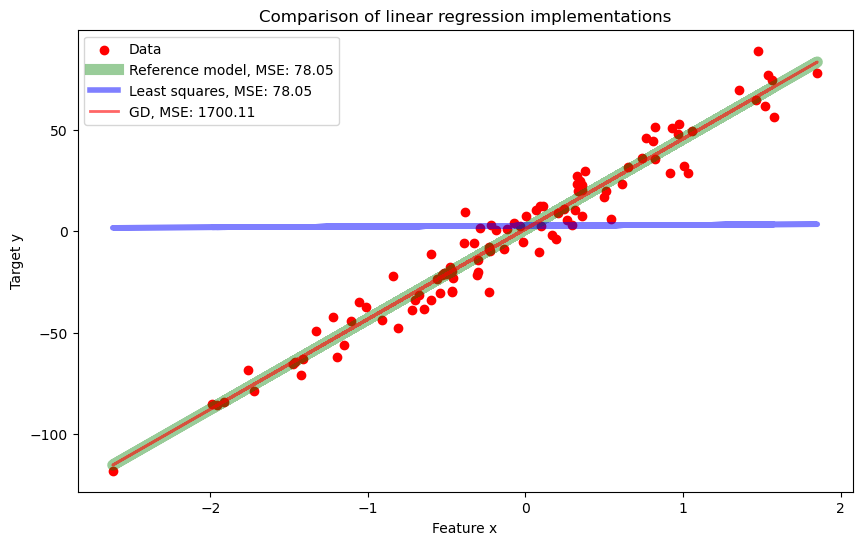

In [19]:
import tests
import numpy as np
from sklearn.linear_model import LinearRegression
tests.linear_regression(MyLinearRegression, LinearRegression, epochs=1000, learning_rate=0.01)


# Project 1.1: Logistic regression (week 2) <a class="anchor" id="project11_log"></a> 
## Logistic regression theory in a nutshell 

Often in biomedical problems, our goal would be to predict a categorical variable such as receiving a positive or negative result to a disease screening. Logistic regression models are more suitable for such tasks compared to linear regression models that focus on predicting continuous numerical values. The formulation of the logistic regression models do have similarities with the linear regression model formulation. Similar to before, we'll go through the logistic regression model formulation, including least squares and gradient descent. Read section 4.3 for a  more detailed explanation of the theory and the derivation of the formulas below.

### Logistic regression model
In logistic regression, we assign a probability to a value X that lies between 0 and 1. We then use this probability to predict a classification by defining a threshold. Probabilities below this threshold are labeled with class 0, else with class 1. We calculate the probability using the function below; $p(y=1|X)$ is to be read as 'the probability that y=1 given the value X'.   

$
\begin{align}
p(y=1|X) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n)}}
\end{align}
$  

Again, the model coefficients denoted by $\theta$ in this equation correspond to the $\beta$ model coefficients in the lecture slides. The equation above is actually equal to the expression used in the lecture slides for the logistic function: 

$
\begin{align}
p(y=1|X) = \frac{e^{(\beta_{0}+\beta_{1}x_1 + \beta_{2}x_2 + \ldots + \beta_n x_n)} }{1 + e^{(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
\end{align}
$  

We usually write $p(y=1)$ instead of $p(y=1|X)$ for simplicity.

Similar to linear regression, we have a matrix formulation with $n$ observations and $m$ variables:

### Matrix formulation 
$
\begin{align}
\mathbf{p} = \frac{1}{1 + e^{-\mathbf{X} \boldsymbol{\theta}}}
\end{align}
$

$
\begin{align}
\mathbf{p} = \begin{bmatrix} p(y_1=1) \\ p(y_2=1) \\ \vdots \\ p(y_m=1) \end{bmatrix} 
,
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1n} \\
1 & x_{21} & x_{22} & \ldots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \ldots & x_{mn}
\end{bmatrix}
,
\boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}
\end{align}
$

### Logistic regression using least squares
We can use the same approach as before to define the gradient of the loss function 

#### Step 1 : Defining loss function 
$
\begin{align}
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
\end{align}
$

<font color='#770a0a'>*1. What is the name of the summation factor?* <font>

#### Step 2 : Calculate gradient of loss function 

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} \mathbf{X}^\top (\mathbf{p} - \mathbf{y})
\end{align}
$

### Gradient descent for logistic regression
The formulation for gradient descent is very similar to the formulation of the linear regression:

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
\end{align}
$

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \frac{1}{m} \mathbf{X}^\top (\mathbf{p} - \mathbf{y})
\end{align}
$


## Logistic regression playground <a name="logreg_2"></a>

### Logistic regression with one variable
A small demo to show how logistic regression parameters affect the outcome. Left the regression curve: values with a predicted probablity >0.5 are classified as ' up' (everything on the right side of the orange dashed line, the decision boundary), anything lower is classified as 'down'. The model incorrectly classifies 4 values as 'up', and 7 values as 'down'. The curves in right panel shows combinations of $\theta_0$ and $\theta_1$ that have the same value of the cost function. The red cross indicates the current set of parameters.

In [5]:
import demos

logr1d = demos.LogisticRegression1D()
logr1d.run()


interactive(children=(FloatSlider(value=1.0, description='$\\theta_0$ (bias):', max=10.0, min=-10.0), FloatSli…

### Logistic regression with two variables
We can scale up by adding a model parameter $\theta_2$. Below, a demo is given for a model with two input parameters and model parameters $\theta_0, \theta_1, \theta_2$. Note that we still have 2 classifications even if we increase model parameters! An additional figure on the right will show how the decision boundaries between classifications moves in response to differences in model parameters. 

In [6]:
import demos

logr2d = demos.LogisticRegression2D()
logr2d.run()


interactive(children=(FloatSlider(value=1.0, description='$\\theta_0$ (bias):', max=10.0, min=-10.0), FloatSli…

## Exercise 2: Implementation of logistic regression model <a class="anchor" id="exercise2"></a> 
In the same way as with linear regression, you will now implement your own class of a logistic regression model and compare this with the 'golden standard', sklearn's ```linear_model.LogisticRegression```. 

<font color='#770a0a'> 1. Update the ```fit``` method (and the ```classify``` method) and compare your class ```MyLogisticRegression``` to sklearn's version. <font>
   




In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def augment_matrix(X):
    return np.c_[np.ones((X.shape[0], 1)), X] 

class MyLogisticRegression:
    def __init__(self, epochs=1000, learning_rate=0.01):
        self.theta = None
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y):
        X_b = augment_matrix(X)       
        n_samples, n_features = X_b.shape
        self.theta = np.random.randn(n_features)

        # your implementation goes here between START EXERCISE x and END EXERCISE x

        # START EXERCISE 2.1 #

        # END EXERCISE 2.1 #

    def predict(self, X):
        X_b = augment_matrix(X)
        return sigmoid(X_b.dot(self.theta))

    def classify(self, X, threshold=0.5):
        # dummy solution, needs to be replaced with the correct solution

        # START EXERCISE 2.2 #

        # END EXERCISE 2.2 #
        return np.zeros(X.shape[0])

   

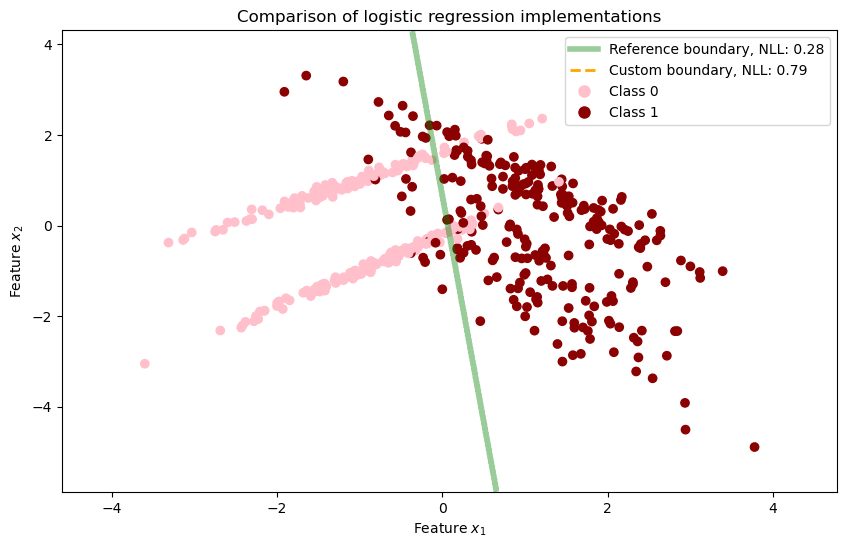

In [8]:
# visualize logistic regression implementation 

%load_ext autoreload
%autoreload 2
    
import tests   
from sklearn.linear_model import LogisticRegression

ReferenceModel = lambda: LogisticRegression(penalty=None)

tests.logistic_regression(MyLogisticRegression, ReferenceModel, epochs=1000, learning_rate=0.5)

## Extra exercise <a class="anchor" id="extra1"></a> 

If you have completed all the previous exercise you can start to play with the dataset that we will use in [Project 1.3](#project13) and perform linear regression on that dataset. 

# Project 1.2: Regularization for linear regression models (week 3)

## Ridge linear regression theory in a nutshell <a class="anchor" id="project12_lin"></a> 

To help constrain the optimization process, we can utilize regularization. You can read more on the theory in chapter 6.2. Ridge regression, like linear regression, is based on minimizing a cost function which we can define as the square of the difference between data point and prediction. The model and the associated loss function do not change compared with linear regression, but we alter the cost function by adding an extra term. Similar to the previous derivations, we use similar steps to define the least squares solution and gradient descent. 

### Ridge regression using least squares

#### Step 1: Defining loss function <a class="anchor" id="ridge_reg"></a>

$
\begin{align}
J(\boldsymbol{\theta}) = \frac{1}{2m} (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y}) + \frac{\alpha}{2m} \boldsymbol{\theta}^\top \boldsymbol{\theta}
\end{align}
$

Compare this cost function to the cost function used in "standard" linear regression.

*<font color='#770a0a'>1. What is the extra term that is being added to the cost function called?</font>*  

*<font color='#770a0a'>2. What effect will adding this extra term have on the solution, i.e. the parameters ```theta```?</font>* 

*<font color='#770a0a'>3. What can be reasons to choose ridge regression over linear regression? When would linear regression be preferable?</font>*  



#### Step 2 : Calculate gradient of loss function

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} (\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y}) + \frac{\alpha}{m} \boldsymbol{\theta}
\end{align}
$

#### Step 3 : Set gradient to 0 to find minima 

To compute the analytical solution, we again set the gradient with respect to the parameters $\theta$ to zero: $\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = 0 \implies$

$
\begin{align}
\frac{1}{m} (\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y}) + \frac{\alpha}{m} \boldsymbol{\theta} = 0
\end{align}
$

$
\begin{align}
\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y} + \alpha \mathbf{I} \boldsymbol{\theta} = 0
\end{align}
$

$
\begin{align}
(\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I}) \boldsymbol{\theta} = \mathbf{X}^\top \mathbf{y}
\end{align}
$

$
\begin{align}
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
\end{align}
$

The solution is identical with the one for "vanilla" linear regression, the only difference is the addition of a diagonal "ridge" $\alpha \mathbf{I}$ to the $\mathbf{X}^\top \mathbf{X}$ component that corresponds to the covariance of the data.

$
\begin{align}
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X} + \underbrace{\alpha \mathbf{I}}_{\text{the "ridge"}})^{-1} \mathbf{X}^\top \mathbf{y}
\end{align}
$

***Hint***: this is the equation that you need to implement in Exercise 3.1.

### Gradient descent for ridge regression
Like in the case of standard linear regression, there may exist situations where the inverse does not compute or becomes unstable. In those cases we follow the same approach as during gradient descent we saw earlier:  

$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) &= \frac{1}{m} (\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} - \mathbf{X}^\top \mathbf{y})  + \frac{\alpha}{m} \boldsymbol{\theta} \\
&= \frac{1}{m} \mathbf{X}^\top ( \mathbf{X} \boldsymbol{\theta} - \mathbf{y})  + \frac{\alpha}{m} \boldsymbol{\theta}
\end{align}
$

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) 
\end{align}
$

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \left(\frac{1}{m} \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y}) + \frac{\alpha}{m} \boldsymbol{\theta}\right)
\end{align}
$

The solution is identical with the one for the "vanilla" linear regression, the only difference is the addition of a term that "shrinks" or "reduces" the parameters towards zero:

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \underbrace{\frac{1}{m} \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})}_{\text {same as l.r.}} \underbrace{- \eta \frac{\alpha}{m} \boldsymbol{\theta}}_{\text{"shrinkage"}}
\end{align}
$

***Hint***: this is one of the equations that you need to implement in the Exercise 3: Implementation of ridge regression</font>


## Exercise 3: Implementation of ridge regression  <a class="anchor" id="exercise3"></a>  

As before, change the code so that your class MyRidge performs optimally. For reference, we compare your class MyRidge with sklearn's ```Ridge``` class. The performance should be similar (although not exactly identical). 

*<font color='#770a0a'>1. Add your code between the comments ```START EXERCISE``` and ```END EXERCISE``` for exercises 3.1 and 3.2 to implement your solution for the analytical (```_solve_normal```, least squares) method and the gradient descent (```_solve_gradient_descent```) method. Visualize your results in the graph to inspect your model. <font>*

*<font color='#770a0a'>2. Compare the ridge model to the standard linear regression model. You'll notice that the MSE of ridge is higher. Does this mean the model does a poorer job when fitting the data? Explain your answer.</font></p>*

In [9]:
import numpy as np

def augment_matrix(X):
    return np.c_[np.ones((X.shape[0], 1)), X] 

class MyRidge:
    def __init__(self, alpha=1.0, solver='normal', epochs=1000, learning_rate=0.01):
        self.theta = None
        self.alpha = alpha
        self.solver = solver
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y):
        if self.solver == 'normal':
            self.theta = self._solve_normal(X, y)
        elif self.solver == 'gd':
            self.theta = self._solve_gradient_descent(X, y, self.epochs, self.learning_rate)
        else:
            raise ValueError("Solver not recognized. Use 'normal' or 'gd'.")

    def _solve_normal(self, X, y):

        X_b = augment_matrix(X)

        # these two lines are not really needed for this solution
        # they are only here so the function returns a valid output
        # and can be removed once it is properly implemented        
        n_samples, n_features = X_b.shape
        self.theta = np.random.randn(n_features)

        # Write your code below

        # START EXERCISE 3.1 #
       
        # END EXERCISE 3.1 #
        
        return self.theta

    def _solve_gradient_descent(self, X, y, n_epochs, learning_rate):

        X_b = augment_matrix(X)
        n_samples, n_features = X_b.shape
        self.theta = np.random.randn(n_features)

        # Write your code below
        # START EXERCISE 3.2 #        
    
        # END EXERCISE 3.2 #

        return self.theta

    def predict(self, X):
        X_b = augment_matrix(X)
        return X_b.dot(self.theta)



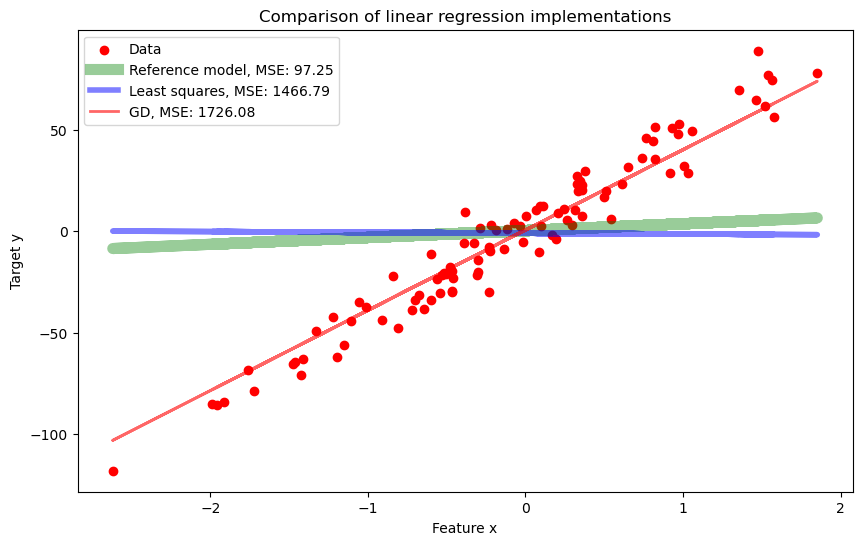

In [10]:
import tests   
from sklearn.linear_model import Ridge
tests.linear_regression(MyRidge, Ridge, alpha=10, epochs=1000, learning_rate=0.01)

# Project 1.2: Regularization for logistic regression models (week 3) <a class="anchor" id="project12_log"></a>
## Ridge logistic regression theory in a nutshell 

As with linear regression, we use the same loss function but we add another term, the 'penalty', to the cost function:

### Ridge logistic regression using least squares
#### Step 1 : Defining loss function 
$
\begin{align}
J(\boldsymbol{\theta}) = \underbrace{-\frac{1}{m} \sum_{i=1}^{m} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]}_{\text{same as logistic regression}} + \underbrace{\frac{\alpha}{2m} \boldsymbol{\theta}^\top \boldsymbol{\theta}}_{\text{ridge penalty}}
\end{align}
$

*<font color='#770a0a'>1. What is the effect of the 'ridge penalty' on the model parameters (```theta```)?* <font>

#### Step 2: Calculate gradient of loss function
$
\begin{align}
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \underbrace{\frac{1}{m} \mathbf{X}^\top (\mathbf{p} - \mathbf{y})}_{\text{same as logistic regression}} + \frac{\alpha}{m} \boldsymbol{\theta}
\end{align}
$

### Gradient descent for ridge logistic regression

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
\end{align}
$

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \left( \frac{1}{m} \mathbf{X}^\top (\mathbf{p} - \mathbf{y}) + \frac{\alpha}{m} \boldsymbol{\theta} \right)
\end{align}
$

The solution is similar to the one for standard logistic regression, with the addition of a term that penalizes large parameter values:

$
\begin{align}
\boldsymbol{\theta}^{(\text{next})} = \boldsymbol{\theta}^{(\text{current})} - \eta \underbrace{\frac{1}{m} \mathbf{X}^\top (\mathbf{p} - \mathbf{y})}_{\text{same as logistic regression}} - \underbrace{\eta \frac{\alpha}{m} \boldsymbol{\theta}}_{\text{ridge penalty}}
\end{align}
$

***Hint***: This is one of the equations that you need to implement in the Exercise 4: Implementating ridge logistic regression.


## Ridge logistic regression playground

The interactive widget below enables you to visualize the influence of the $\alpha$ parameter on the location of the minimum value of a loss function for a regression problem with two variables (in this case for simplicity we only look at the weights and ignore the bias term). Since the combined loss function for a ridge regression model is a linear combination of the mean squared error (MSE) loss and the sum of the squared values of the parameters $\theta_1$ and $\theta_2$ (again, we ignore the bias $\theta_0$). The alpha determines the influence of the ridge penalty on the combined loss. In other words, when $\alpha$ has a low value the ridge penaly has small influence on the combined loss, and as $\alpha$ increases so as the influence. In the edge cases, when $\alpha = 0$, the we end up with unregularized regression model and for very, very large values of $\alpha$ the parameters of the model will become zero. 

In [11]:
import demos

ridge = demos.RegularizedRegression()
ridge.run()

interactive(children=(FloatLogSlider(value=1.0, description='$\\alpha$', max=3.0, min=-3.0), Output(layout=Lay…

## Exercise 4: Implementing ridge logistic regression <a class="anchor" id="exercise4"></a>

This exercise is similar to the previous exercises: complete the code and check how well your algorithm is doing against sklearn's version (```LogisticRegression```). Implement your solution between the comments ```START EXERCISE 4.1``` and ```END EXERCISE 4.1```.  

The tester uses sklearn's LogisticRegression (as we also did when testing the standard logistic regression. The difference is in the parameter ```penalty```: standard logistic regression had ```penalty = None```, now we use ```penalty= 'l2'```.   

<font color='#770a0a'> 1. *What types of penalties are there, what do the abbreviations mean and what is the effect of penalties (if any)?* <font> <font color='#770a0a'> (**Hint**: Read ch 6.2, or check sklearn's documentation and/or do an internet search) <font>

<font color='#770a0a'> 2. *The choice for setting ```penalty= 'l2'``` is not arbitrary, but follows from the approach described in the theory above. Explain how the cost function described above corresponds to setting the penalty to type l2.* <font>



In [12]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def augment_matrix(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

class MyRidgeLogisticRegression:
    def __init__(self, alpha=1.0, epochs=1000, learning_rate=0.01):
        self.theta = None
        self.alpha = alpha
        self.epochs = epochs
        self.learning_rate = learning_rate

    def fit(self, X, y):
        X_b = augment_matrix(X)
        n_samples, n_features = X_b.shape
        self.theta = np.random.randn(n_features)

        # Write your code below
        # START EXERCISE 4.1 #

        # END EXERCISE 4.1 #

    def predict(self, X):
        X_b = augment_matrix(X)
        return sigmoid(X_b.dot(self.theta))

    def classify(self, X, threshold=0.5):
        return (self.predict(X) >= threshold).astype(int)

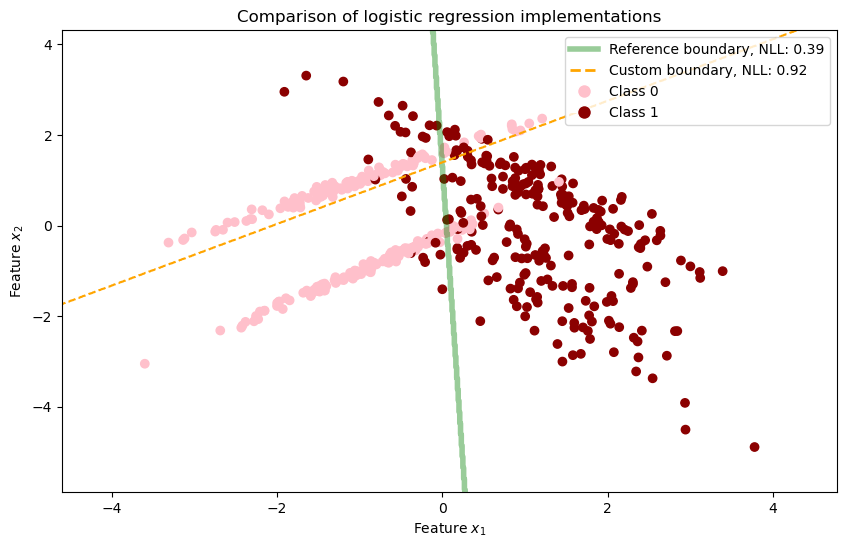

In [13]:
import tests   
from sklearn.linear_model import LogisticRegression
 
ReferenceModel = lambda alpha: LogisticRegression(penalty='l2', C=1./alpha)

tests.logistic_regression(MyRidgeLogisticRegression, ReferenceModel, alpha=100, epochs=1000, learning_rate=0.5)

# Influence of the regularization parameter $\alpha$ (week 3)<a class="anchor" id="project12_reg"></a>

An important distinction between 'vanilla' regression models and ridge regression is the additional term with the regularization parameter $\alpha$ (also often indicated as $\lambda$). In this section, we'll take a deeper look at this value and how it influences the regularization. Additionally, we'll utilize k-fold cross-validation to also test our model performance on a data set which wasn't used for training. You can read paragraph 5.1.3 for more info on k-fold cross-validation, and check sklearn's documentation on the KFold class. 

Study the code below, and make sure you understand how the losses in the graph are computed.

*<font color='#770a0a'>1. What value of &alpha; is optimal in this case and why?</font>*  

*<font color='#770a0a'>2. Having selected the optimal &alpha;, how would you would progress?</font>* 

*<font color='#770a0a'>3. Try to understand the influence of $\alpha$ on the training and test loss. Explain the U-shaped curves- why do the train and test losses increase for large values of &alpha; ?</font>*

*<font color='#770a0a'>4. Inspect the graph visualizing the influence of $\alpha$ on the scale of the model parameters. Could you explain explain what you see based on the [ridge regression formulation](#ridge_reg)?*


In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

# first, generate a toy classification problem
# 2 classes with 1000 samples in total, 100 features per sample
# only 10% of the features are informative, the others are "noise"
X, y = make_classification(
    n_samples=1000,
    n_features=100,
    n_informative=20,
    n_redundant=5,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# define range of alpha values to evaluate
# we do this on a logarithmic scale since it is expected that alpha has
# a non-linear effect, i.e., small changes can have a significant effect 
# for small values of alpha and less so when alpha is large.
alpha_values = np.logspace(-3, 3, 20)

# use a cross-validation setup, where the data is randomly split into 10 parts (a.k.a. folds)
# each experiment 9 folds are used for training of the model and 1 for testing
kf = KFold(n_splits=10, shuffle=True, random_state=42) #setting random_state ensures the randomization is reproducable

## Influence of $\alpha$ on the training and test loss

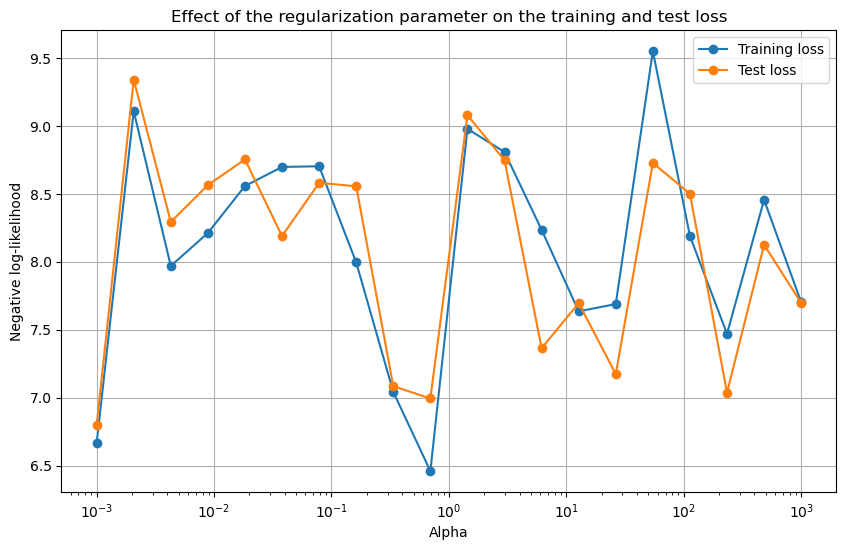

In [15]:
import matplotlib.pyplot as plt
import numpy as np

train_losses = []
test_losses = []

def nll(y, p):
    # clip the probabilities to avoid numerical issues (e.g. computing log(0))
    eps = 1e-15
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

# for each value of alpha on the logaritmic range perform 10 cross-valiadtion experiments
# store the average training and test loss for each alpha
for alpha in alpha_values:
    fold_train_losses = []
    fold_test_losses = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = MyRidgeLogisticRegression(alpha=alpha, epochs=1000, learning_rate=0.1)
        model.fit(X_train, y_train)
        
        p_train = model.predict(X_train)
        p_test = model.predict(X_test)
        
        fold_train_losses.append(nll(y_train, p_train))
        fold_test_losses.append(nll(y_test, p_test))
    
    train_losses.append(np.mean(fold_train_losses))
    test_losses.append(np.mean(fold_test_losses))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_losses, marker='o', label='Training loss')
plt.plot(alpha_values, test_losses, marker='o', label='Test loss')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative log-likelihood')
plt.title('Effect of the regularization parameter on the training and test loss')
plt.legend()
plt.grid(True)
plt.show()

## Influence of $\alpha$ on the scale of the model parameters

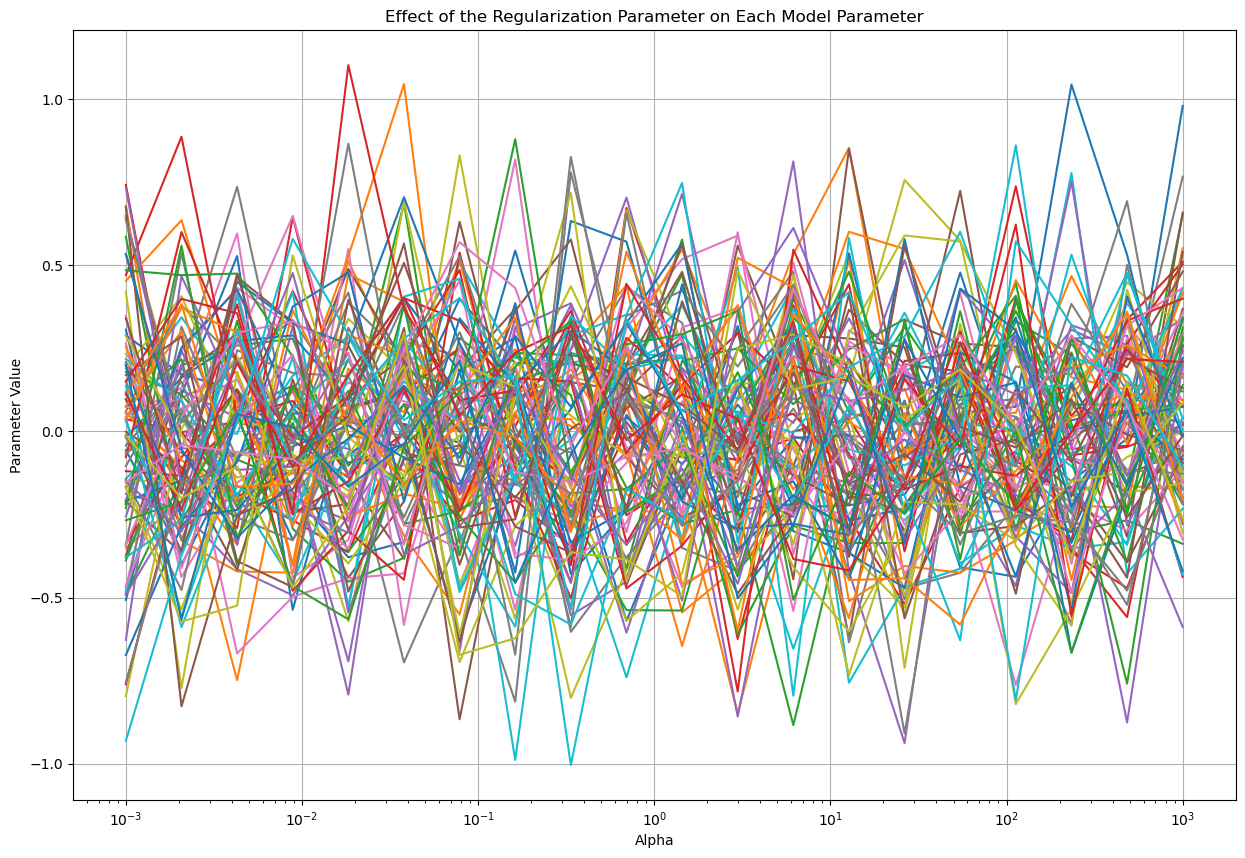

In [16]:
import matplotlib.pyplot as plt
import numpy as np

parameter_values = []

# for each value of alpha on the logarithmic range, perform 10 cross-validation experiments
# store the average fitted model parameters for each alpha
for alpha in alpha_values:
    fold_parameters = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = MyRidgeLogisticRegression(alpha=alpha, epochs=1000, learning_rate=0.1)
        model.fit(X_train, y_train)
        
        fold_parameters.append(model.theta)

    mean_parameters = np.mean(fold_parameters, axis=0)    
    parameter_values.append(mean_parameters)

parameter_values = np.array(parameter_values)

plt.figure(figsize=(15, 10))
for i in range(parameter_values.shape[1]):
    plt.plot(alpha_values, parameter_values[:, i], label=f'Parameter {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Parameter Value')
plt.title('Effect of the Regularization Parameter on Each Model Parameter')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Comparison ridge and lasso regularization (week 3) <a class="anchor" id="project12_comp"></a>
Next to ridge regression, we also discussed lasso regression in the lectures. There are some slight differences in these different regularization approaches, which we'll illustrate by exploring lasso regression in more detail and comparing it with ridge regression.  

## Lasso regression playground
Similar to ridge regression, we can use the playground to get a first look at lasso regression. 

In [17]:
import demos

lasso = demos.RegularizedRegression(penalty_type='lasso', penalty_cutoff=3)
lasso.run()

interactive(children=(FloatLogSlider(value=1.0, description='$\\alpha$', max=3.0, min=-3.0), Output(layout=Lay…

## Influence of $\alpha$ on the scale of the model parameters
To compare ridge and lasso regression, we repeat the same experiment for lasso regression using the sklearn implementation. 

Inspect the code below and answer the following questions:

*<font color='#770a0a'>1. What is the main difference between the ridge and lasso approach?</font>*  

*<font color='#770a0a'>2. From the earlier graph that shows the influence of &alpha; on training and test loss, one would conclude that a value &alpha; approximately equal to 10 would yield optimal results. Would you still say so seeing the graph below?</font>*  

*<font color='#770a0a'>3. In this case we know that the dataset has 90 of the 100 parameters as 'noise', i.e. leaving them out would not have made a difference for the model outcome. (Unfortunately, we don't know which parameters are rubbish, otherwise we would obviously not use them at all). Would a-priori knowledge that your dataset contains a lot of noise parameters have influenced your choice of model (standard least squares, ridge or lasso)? Why (not)?</font>*


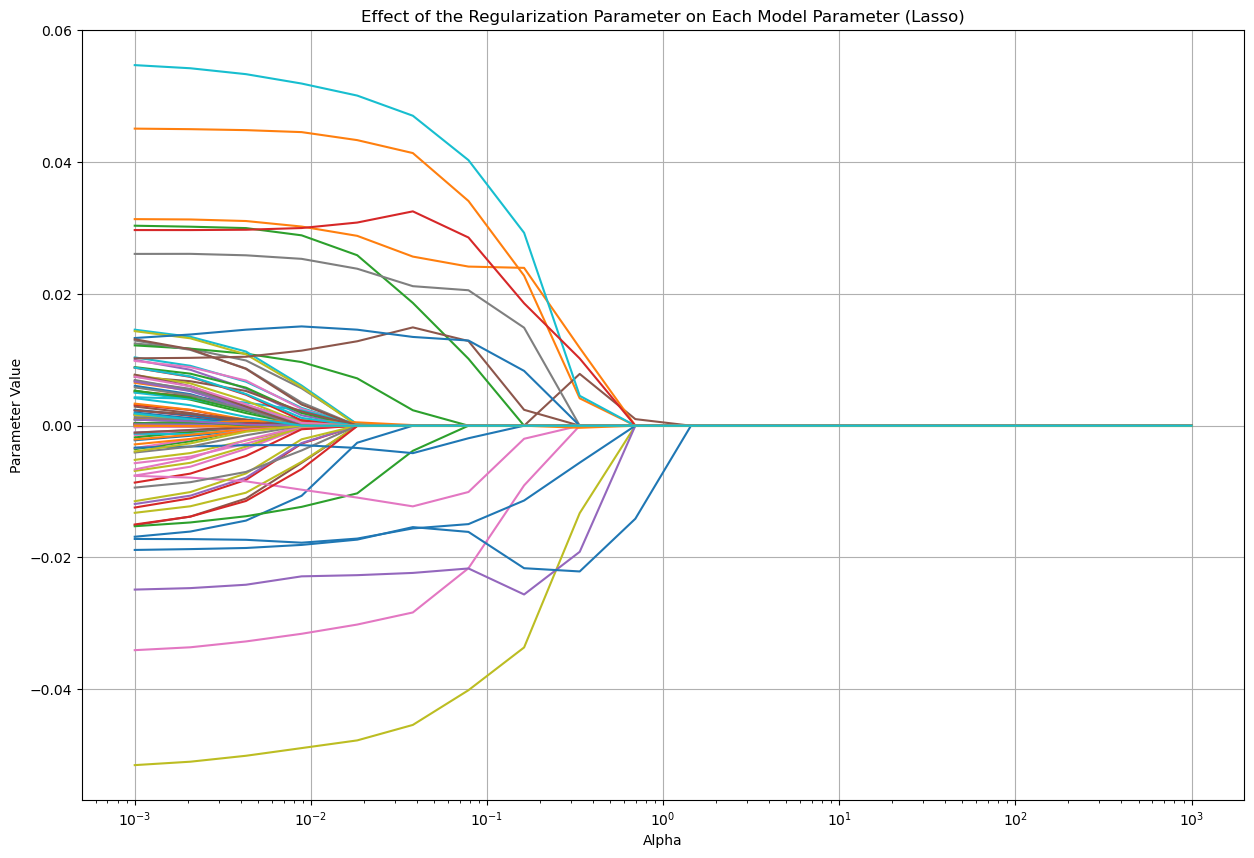

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

parameter_values = []

for alpha in alpha_values:
    fold_parameters = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = Lasso(alpha=alpha, max_iter=1000)
        model.fit(X_train, y_train)
        
        fold_parameters.append(model.coef_)    
    
    mean_parameters = np.mean(fold_parameters, axis=0)
    parameter_values.append(mean_parameters)

parameter_values = np.array(parameter_values)

plt.figure(figsize=(15, 10))
for i in range(parameter_values.shape[1]):
    plt.plot(alpha_values, parameter_values[:, i], label=f'Parameter {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Parameter Value')
plt.title('Effect of the Regularization Parameter on Each Model Parameter (Lasso)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Extra exercise <a class="anchor" id="extra2"></a>

If you have completed all the previous exercise you can start to play with the dataset that we will use in [Project 1.3](#project13) and perform linear regression on that dataset. 

# Project 1.3: Application of linear models to a case study <a class="anchor" id="project13"></a>

NB: From this section (1.3) onwards, your answers will be checked and graded!

## Problem introduction
Precision medicine is crucial in oncology because it allows for treatments to be tailored to the individual molecular characteristics of each patient's cancer, thereby improving efficacy and reducing side effects. In this project, you will develop a linear regression model to predict the effectiveness of Trametinib, a MEK inhibitor used in the treatment of various cancers, by leveraging transcription factor (TF) activities inferred from gene expression data.

## Dataset
The data we use for this project consist in 878 cell lines trated with Trametinib. The activity of 574 TFs was derived for each cell line  from gene expression data. Additionally, the measured activity of Trametinib is reported in terms of IC50 values, which indicate the concentration of Trametinib needed to inhibit cancer cell viability by 50%.
The data is stored as comma-separated value (CSV) file that can be loaded in Python with the pandas library. It is assumed that the first row contains the variable names (names of the input features) and with index_col = 0 we indicate that the first column of the table corresponds to the cell line IDs (each cell line is a row). The column LN_IC50 contain the IC50 values for each cell line (i.e. your output variable) and the following columns the TF activities (i.e. your input variables). The TF activity data normalized (zero mean and unit standard deviation, a common practice to ensure all features can have similar influence on the outcome variable)

In [19]:
import pandas as pd

file_path = 'data/Trametinib_TFactivity_Student.csv'

data = pd.read_csv(file_path, index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Trametinib_TFactivity_Student.csv'

You can print the firs few rows of the data using the following command:

In [ ]:
print(data.head())

             LN_IC50      ABL1       AHR      AIRE       AP1     APEX1  \
Unnamed: 0                                                               
SIDM00848  -0.096400 -1.977971 -0.399163  0.699321 -0.382129 -0.675339   
SIDM01099  -2.130770  0.701464 -1.365000 -1.815339 -1.347788 -1.208576   
SIDM01141  -6.333171 -0.122094  0.336628  0.388330  0.331923  1.873811   
SIDM00807   0.271131  1.162998  1.401365  0.593262  1.105207  1.509200   
SIDM00198   0.053364 -0.947609 -0.667141  0.293002 -0.576490 -0.356822   

                  AR    ARID1A    ARID3A    ARID3B  ...    ZNF350   ZNF354C  \
Unnamed: 0                                          ...                       
SIDM00848  -0.825937 -0.405920  0.105294  0.188555  ... -0.887101 -1.641169   
SIDM01099  -1.126166 -1.478192  0.786353  0.438625  ...  1.562204  0.337569   
SIDM01141   0.361419  0.146270 -0.763079 -0.133088  ... -0.692590  0.082466   
SIDM00807   1.310114  1.396739  1.238887  0.393633  ... -1.169669  0.537109   
SIDM001

The following code will create an interactive widget that will help you visualize the relationship between the target variable and individual input features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# the first column (not counting the IDs) is the target variable y
y = data.iloc[:, 0]
# the rest are the input features
X = data.iloc[:, 1:]

def plot_correlation(feature):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Target y')
    plt.title(f'Correlation between {feature} and Target y')
    plt.grid(True)
    plt.show()

# create an interactive widget
feature_selector = widgets.Dropdown(
    options=X.columns,
    description='Feature:',
    disabled=False,
)

interact(plot_correlation, feature=feature_selector);


NameError: name 'data' is not defined

## Experimental setup

In order to correctly traing and evaluate machine learning models using our dataset, we have to split it into three subsets, each with a unique function:
* The **training dataset** is used for fitting of the model parameters ($\boldsymbol \theta$)
* The **validation dataset** is used for selecting the best model and its hyperparameters. For example, it can be used to find the optimal value of the regularization parameter $\alpha$.
* The **test dataset** is used to evaluate the optimal model training using the training dataset and selected hyperparameters based on the performance on the validation dataset. Evaluation on the test dataset should be done as little as possible and ideally only once once the training and model selection procedure is completed. Otherwise, you run into the risk of overfitting your models.

There is no good way to select the size of the three different datasets and it is ultimately a design choice. However, you have to make sure that the test dataset is sufficiently large and representative of the entire data so that the evaluation metrics computed using it are a good estimate of the real-world performance. Similarly, the validation set should be sufficiently large and representative so that it provides robust model selection. Read also chapter 5 of the book, 'resampling methods'.

For this project we have already reserved 20% of the data (175 cell lines) as a test set that is not provided to you but is kept to evaluate your model performances as part of the evaluation of this project. The questions in dark red in this section will be part of the evaluation of the assignment and are to be answered consicely and clearly.

**Check the deliverables section at the bottom for details on handing in the assignment!**

For this project you can use the `scikit-learn` library for model training and evaluation.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

## Question 1: comparing linear regression and Lasso regression

From the provided dataset (702 cell lines, 574 TFs) reserve 20% of the data for validation. Compare a linear regression and a Lasso regression model trained on the training set.

In [ ]:
from sklearn.model_selection import train_test_split

# your implementation goes here



*<font color='#770a0a'>1. Plot the Mean Squared Error (MSE) computed on the training set and on the validation set for both models. For Lasso regression try five different values of the `alpha` hyperparameter that illustrate the effect of regularization.</font>*

*<font color='#770a0a'>2. What are the differences between linear regression and Lasso regression in terms of performances (on the training and test set)?</font>*

*<font color='#770a0a'>3. What is the effect of the `alpha` hyperparameter? </font>*

## Question 2: selection of the hyperparameter

On the provide dataset (702 cell lines) please use 5-fold cross validation (using `sklearn.grid_search.GridSearchCV`) to select the the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. With 5-fold cross validation the dataset is divided in five groups. Each group is used once as a validation test, while the remaining groups are used as training sets. This procedure allows to evaluate the model multiple times to be more confident in the model design. 

*<font color='#770a0a'>1. Plot the MSE across the cross-validation runs (y-axis, as mean and standard deviation) for the different values alpha (x-axis) for both the training and validation data.</font>*

*<font color='#770a0a'>2. What is the effect of the regularization parameter in terms of bias and variance? </font>*

*<font color='#770a0a'>3. What is the `alpha` hyperparameter corresponding to the minimum cross-validation error? </font>*

*<font color='#770a0a'>4. Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer. </font>*

In [ ]:
# your implementation goes here

## Question 3: most informative features

Fit a linear regression and a Lasso regression model on all the provided data (700 cell lines). For the lasso regression model use the `alpha` hyperparameter selected using cross-validation in Question 2.

*<font color='#770a0a'>1. Print the name of the 10 most predictive TFs for each model. </font>*

*<font color='#770a0a'>2. Submit your optimal model to be evaluated on a separate test set. Models will be evaluated using MSE as metric. You have to chose if to sumit the linear regression or the Lasso regression model trained on the available data. Briefly motivate your choice. </font>*

In [ ]:
# your implementation goes here

## Deliverables

Please submit ONE ipynb file containing the questions that were asked, the code generated and the answers to the questions per group.

**Note**: only section 1.3 will be evaluated.

 The code should be commented, structured and logical variable names should be used. The answers to the questions should be clear and concise.

Please give the following name to your file:

part_1_group_**your_group_number**
